# Homework 3: PCA/Hyperparameter/CV
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

# Preparation

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff('./data/4year.arff')
df = pd.DataFrame(data[0])
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [2]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [3]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Feature Extraction
Extract 3 features using PCA method.

In [5]:
# from sklearn.decomposition import PCA
# pca = PCA()
# X_train_pca = pca.fit_transform(X_train_std)
# X_test_pca = pca.transform(X_test_std)
# pca.explained_variance_ratio_

In [6]:
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt

# plt.style.use('ggplot')
# plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
# plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
# plt.ylabel('Explained Variance Ratio')
# plt.xlabel('Principal Vomponents')
# plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.17496515, 0.09121706, 0.08114628])

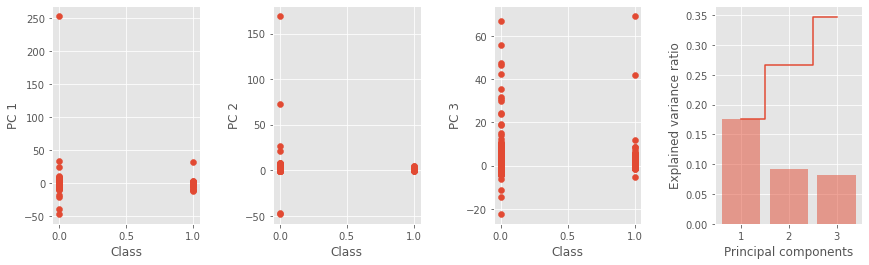

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.subplot(141)
plt.scatter(y_train, X_train_pca[:, 0])
plt.xlabel('Class')
plt.ylabel('PC 1')
plt.subplot(142)
plt.scatter(y_train, X_train_pca[:, 1])
plt.xlabel('Class')
plt.ylabel('PC 2')
plt.subplot(143)
plt.scatter(y_train, X_train_pca[:, 2])
plt.xlabel('Class')
plt.ylabel('PC 3')
plt.subplot(144)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.subplots_adjust(right=2, wspace=0.5)
plt.show()

## Apply Models
Using the selected features from above, we are going to apply LR / SVM / decision tree. 

### LR

In [9]:
from sklearn.linear_model import LogisticRegression
# simply using c chosen in previous HW 😀
c=0.1
lr = LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0)
lr = lr.fit(X_train_pca, y_train)
print(f'Accuracy when [c={c}] \nTrain {lr.score(X_train_pca, y_train)}\nTest  {lr.score(X_test_pca, y_test)}')

Accuracy when [c=0.1] 
Train 0.946892325649256
Test  0.9462219196732471


### SVM 

In [10]:
from sklearn.svm import SVC
# simply using g chosen in previous HW 😀
g = 0.2
svm = SVC(kernel='rbf', gamma=g, random_state=0)
svm.fit(X_train_pca, y_train)
print(f'Accuracy when [gamma={g}] \nTrain {svm.score(X_train_pca, y_train)}\nTest  {svm.score(X_test_pca, y_test)}')

Accuracy when [gamma=0.2] 
Train 0.9480595272833382
Test  0.9472430224642614


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
# simply using depth chosen in previous HW 😀
depth = 2
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
tree.fit(X_train_pca, y_train)
print(f'Accuracy when [gamma={g}] \nTrain {tree.score(X_train_pca, y_train)}\nTest  {tree.score(X_test_pca, y_test)}')

Accuracy when [gamma=0.2] 
Train 0.9474759264662971
Test  0.9472430224642614


# Using pipeline
Implement the methods using pipeline. (__PML__ p185)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# simply using c, g, depth chosen in previous HW 😀
c, g, depth = 0.1, 0.2, 2
# Assign pipes:
## Logistic regression
pipe_lr =make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0))
## SVM
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        SVC(kernel='rbf', gamma=g, random_state=0))
## Decision tree
pipe_tree = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0))


In [14]:
# Model accuray interation
for model in [pipe_lr, pipe_svm, pipe_tree]:
    X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
    model.fit(X_train, y_train)
    # print(np.isnan(X_train).any(), np.isnan(y_train).any(), np.isnan(X_test).any(),np.isnan(y_test).any())
    y_pred = model.predict(X_test)
    print(f'Pipeline: {model.named_steps.keys()}\nAccuracy of : {model.score(X_test, y_test)}\n') # only in Python>=3.7

Pipeline: dict_keys(['standardscaler', 'pca', 'logisticregression'])
Accuracy of : 0.9462219196732471

Pipeline: dict_keys(['standardscaler', 'pca', 'svc'])
Accuracy of : 0.9472430224642614

Pipeline: dict_keys(['standardscaler', 'pca', 'decisiontreeclassifier'])
Accuracy of : 0.9472430224642614



## Grid Search
Use grid search for finding optimal hyperparameters. (__PML__ p199). In the search, apply 10-fold cross-validation.

In [15]:
# # Check avalible parameters
# pipe_lr.get_params().keys()

In [16]:
from sklearn.model_selection import GridSearchCV

pipe_lr = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0))

param_range = [ 1e-05, 1e-04, 1e-03, 1e-02, 0.1, 1, 10, 100, 1000]

param_grid = [{'logisticregression__C': param_range,
               'logisticregression__penalty': ['l1'],
               'logisticregression__solver': ['liblinear']},
              {'logisticregression__C': param_range,
               'logisticregression__penalty': ['l2']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9474758996403567
{'logisticregression__C': 1e-05, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [17]:
clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.947
